L'utilisation de cette base de donnée est peut être mieux car mieux répartie dans le temps afin de capter les dépendances long terme et mieux répartie en terme de magnitude.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('eq_1960_2022.csv', sep=',')

In [3]:
data.head()

,Unnamed: 0,time,latitude,longitude,depth,mag
0,0,2021-11-02T04:33:46.997Z,32.8876,136.8920,433.36,4.2
1,1,2021-11-02T11:00:40.223Z,31.0448,141.9867,10.00,4.5
2,2,2021-11-02T15:00:11.748Z,36.0259,143.0997,10.00,4.6
3,3,2021-11-03T00:02:23.264Z,35.9514,143.0183,10.00,4.5
4,4,2021-11-03T02:35:56.019Z,37.0785,141.2569,45.96,4.6


In [5]:
data.drop(["Unnamed: 0"], inplace = True, axis=1)

In [6]:
data.tail()

,time,latitude,longitude,depth,mag
31460,1960-03-23T10:28:54.000Z,39.137,143.598,25.0,5.9
31461,1960-03-23T11:51:02.000Z,39.146,143.564,25.0,5.8
31462,1960-03-23T22:22:40.000Z,39.235,143.303,15.0,6.2
31463,1960-02-04T16:50:32.000Z,38.667,143.014,25.0,6.1
31464,1960-01-31T05:08:21.000Z,33.093,134.885,20.0,6.3


Text(0.5, 1.0, 'Histogramme des tremblements de terre selon leur magnitude')

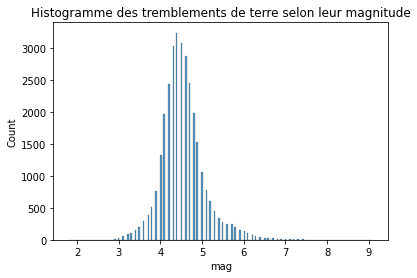

In [8]:
sns.histplot(data.mag)
plt.title("Histogramme des tremblements de terre selon leur magnitude")

Le profile gausien facilitera les calculs

In [9]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [10]:
def draw_screen_poly( lats, lons, m, facecolor='red', alpha=.1):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(poly)

In [13]:
def plot_map(data, var: str, grid=False, show_poly=False, show_other=False):
    """val: column name of the variable to plot"""
    fig = plt.figure(figsize=(14, 14))
    #m = Basemap(projection='lcc', resolution=None, lat_1=35.5, lat_2=42, lat_0=38, lon_0=140, width=2.1E6, height=2.1E6,)
    m = Basemap(projection='cyl',llcrnrlat=28,urcrnrlat=48, 
                llcrnrlon=127,urcrnrlon=151)
    m.shadedrelief()
    xpt, ypt = m(data.longitude, data.latitude)
    m.scatter(xpt, ypt, s = data[var].values, c = data[var].values)

    if grid:
        m.drawparallels(np.arange(int(29),int(49),1),labels=[1,0,0,0])
        m.drawmeridians(np.arange(int(128),int(153),1),labels=[0,0,0,1])

    if show_poly:
        # polygon not defined in map coordinate
        lats = [30, 46, 46, 30]
        lons = [129, 129, 149, 149]
        
        # polygon in map coordinates
        #lats = np.linspace(30, 47, 40)
        #lons = np.linspace(129, 150, 40)
        draw_screen_poly(lats, lons, m)

    if show_other:
        # rectangle haut gauche
        latsA = [39, 46, 46, 39]
        lonsA = [129, 129, 137, 137]
        draw_screen_poly(latsA, lonsA, m, "grey", .4)

        # rectangle bas droit
        latsB = [30, 35, 35, 30]
        lonsB = [144, 144, 149, 149]
        draw_screen_poly(latsB, lonsB, m, "grey", .4)

        # rectangle milieu droit
        latsC = [35, 41, 41, 35]
        lonsC = [146, 146, 149, 149]
        draw_screen_poly(latsC, lonsC, m, "grey", .4)

    plt.plot()

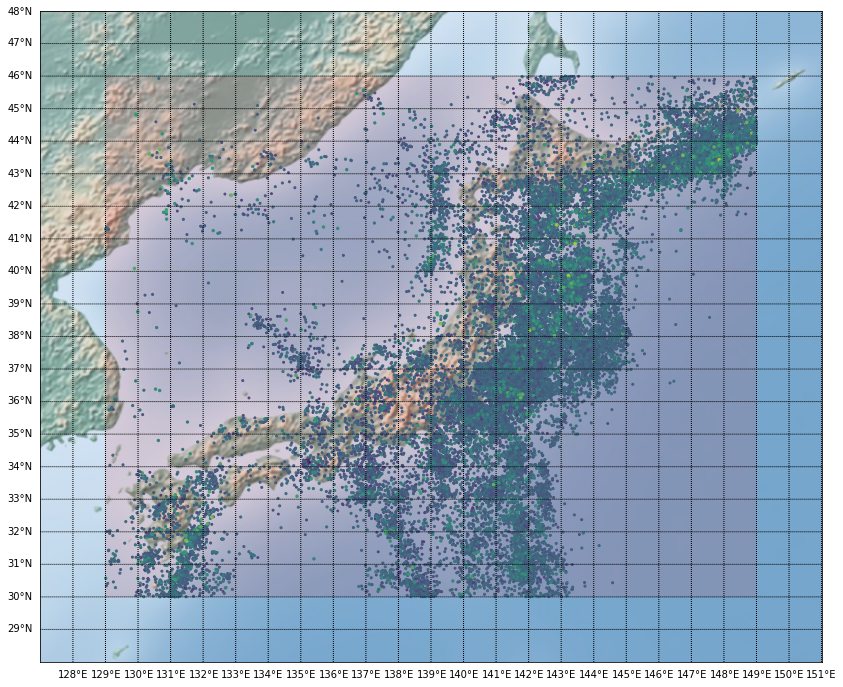

In [15]:
plot_map(data, "mag", grid=True, show_poly=True)

## Diviser en zones

In [16]:
grid_lat = list(range(46, 29, -1))
grid_lon = list(range(129, 150))

In [17]:
def to_zone(lat: float, lon: float) -> int:
    """Convert coordinates to a zone number according to the map arrangement above"""
    try:
        return grid_lat.index(int(lat)) * 20 + grid_lon.index(int(lon)) + 1
    except:  # erreur si les coordonnées ne sont pas dans les grid_lat, grid_lon, ce qui veut dire pas dans le carré rouge
        return 0

In [18]:
data["zone"] = data.apply(lambda x: to_zone(x['latitude'], x['longitude']), axis=1)

In [19]:
data.head()

,time,latitude,longitude,depth,mag,zone
0,2021-11-02T04:33:46.997Z,32.8876,136.8920,433.36,4.2,288
1,2021-11-02T11:00:40.223Z,31.0448,141.9867,10.00,4.5,313
2,2021-11-02T15:00:11.748Z,36.0259,143.0997,10.00,4.6,215
3,2021-11-03T00:02:23.264Z,35.9514,143.0183,10.00,4.5,235
4,2021-11-03T02:35:56.019Z,37.0785,141.2569,45.96,4.6,193
